# Document Representations: Bag-Of-Words Assignment

In [1]:
import re
import string

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize # Sentence Tokenizer
from nltk.tokenize import word_tokenize # Word Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\City_Year\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\City_Year\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1) (optional) Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [2]:
df = pd.read_csv('datasets/job_listings_1.csv')
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


## 2) Use NLTK to tokenize / clean the listings 

In [3]:
def tokenize_words(doc):
    import re
    
    from nltk.corpus import stopwords
    import string
    
    table = str.maketrans('','', string.punctuation)
    stop_words = set(stopwords.words('english'))
    # strip HTML
    doc = re.sub('<[^<]+?>', '', doc)
    # Tokenize by word
    tokens = word_tokenize(doc)
    # Strip punctuation from within words
    tokens = [x.lower().translate(table) 
              for x in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    tokens = [w for w in tokens if not w in stop_words]
    # lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    
    return tokens

In [4]:
df['tokenized_desc'] = df.apply(lambda row: tokenize_words(row['description']), axis=1)

In [5]:
# not sure why the 'b' from the byte string is converted
df['tokenized_desc'].head()

0    [b, job, requirement, nconceptual, understandi...
1    [bjob, descriptionnnas, data, scientist, help,...
2    [ba, data, scientist, working, consulting, sid...
3    [b, monthcontractunder, general, supervision, ...
4    [blocation, usa, multiple, year, analytics, ex...
Name: tokenized_desc, dtype: object

# 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# List of document strings as text
token_list = df['tokenized_desc'].to_list()
token_list = [" ".join(doc) for doc in token_list]
# Instantiate vectorizer object
vectorizer = CountVectorizer(lowercase=True, stop_words='english')
bag_of_words = vectorizer.fit_transform(token_list)

In [7]:
bow_df = pd.DataFrame(bag_of_words.toarray(), 
                      columns=vectorizer.get_feature_names())
print(bow_df.shape)
bow_df.head()

(426, 14122)


,aaai,aaeeo,ab,abernathy,abilitiesnability,abilitiesndevelops,abilitiesnexperience,abilitiesnninterpersonal,abilitiesnproblem,abilitiesnsolid,...,zenreach,zero,zeus,zf,zheng,zillow,zonesnability,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4) Visualize the most common word counts

In [11]:
top_10 = bow_df.sum(axis=0).sort_values(ascending=False).head(10)

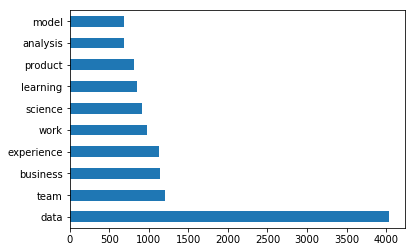

In [13]:
top_10.plot.barh();

 # 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [17]:
token_list = df['tokenized_desc'].to_list()
token_list = [" ".join(doc) for doc in token_list]

tfidf = TfidfVectorizer(max_features = 20)
feature_matrix = tfidf.fit_transform(token_list)
feature_names = tfidf.get_feature_names()

df = pd.DataFrame(data=feature_matrix.toarray(), 
                  columns=feature_names)
df.head()

,analysis,analytics,business,customer,data,experience,learning,machine,model,new,opportunity,product,science,scientist,skill,solution,statistical,team,technology,work
0,0.0,0.000000,0.000000,0.000000,0.204459,0.462075,0.272773,0.290315,0.606359,0.000000,0.000000,0.000000,0.254170,0.000000,0.300078,0.0,0.000000,0.000000,0.0,0.252340
1,0.0,0.000000,0.111835,0.301943,0.351250,0.396911,0.351458,0.374060,0.130212,0.268672,0.000000,0.253194,0.218326,0.109691,0.000000,0.0,0.000000,0.303377,0.0,0.216754
2,0.0,0.000000,0.549784,0.000000,0.431687,0.000000,0.191975,0.204320,0.426749,0.000000,0.000000,0.000000,0.178882,0.359494,0.211192,0.0,0.211734,0.000000,0.0,0.000000
3,0.0,0.000000,0.000000,0.000000,0.389583,0.000000,0.000000,0.000000,0.000000,0.297992,0.274504,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.672970,0.0,0.480816
4,0.0,0.494686,0.395779,0.000000,0.621527,0.000000,0.000000,0.000000,0.460813,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000


## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.